# Traffic collisions in Los Angeles County

This is a Jupyter Notebook for analyzing the traffic collision data available for Los Angeles County through <a href="http://tims.berkeley.edu">TIMS</a>. The analysis uses the Pandas package in Python:


In [2]:
import pandas

# Analyzing data

Here I will analyze data about traffic collisions in Los Angeles County. First, let's load the data set into pandas and take a look at it. This particular data set is for the collisions which occurred in Los Angeles County in January 2012.

In [3]:
#Load the data, show data size

data = pandas.read_csv('Jan12Collisions.csv')
data.shape

(4146, 83)

This means there are 4146 collisions recorded (instances) and 83 observations (features) for each collision.

In [7]:
# What does the data look like? limit to first five rows

data.iloc[:5,:]

CASEID     POINT_X    POINT_Y  YEAR_  LOCATION CHPTYPE  DAYWEEK  CRASHSEV  \
0  6413841    0.000000   0.000000   2012      1942       0        2         3   
1  6348475 -118.208609  33.873498   2012      1900       3        1         4   
2  6216712 -118.210569  33.925397   2012      1943       1        4         4   
3  6071228 -118.536040  34.168913   2012      1942       0        5         4   
4  6063954 -118.168333  34.114790   2012      1970       0        4         4   

  VIOLCAT  KILLED    ...     BICINJ MCKILL MCINJURE RAMP1 RAMP2  \
0      09       0    ...          0      0        0     -     -   
1      03       0    ...          0      0        0     -     -   
2      03       0    ...          0      0        0     -     -   
3      00       0    ...          0      0        0     -     -   
4      18       0    ...          1      0        0     -     -   

             CITY       COUNTY  STATE      X_CHP     Y_CHP  
0     LOS ANGELES  LOS ANGELES     CA    0.00000   0.00000  
1  UNINCORPORATED  LOS ANGELES     CA -118.20821  33.87339  
2         LYNWOOD  LOS ANGELES     CA -118.21148  33.92575  
3     LOS ANGELES  LOS ANGELES     CA    0.00000   0.00000  
4  SOUTH PASADENA  LOS ANGELES     CA    0.00000   0.00000  

[5 rows x 83 columns]

## Column labels?

The many columns of this data table are labeled in ways that aren't entirely clear. One can refer to the <a href= "https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwiVlLOUxrfOAhVKw2MKHcgiA0QQFggeMAA&url=http%3A%2F%2Ftims.berkeley.edu%2Fhelp%2Ffiles%2FSWITRS_codebook.doc&usg=AFQjCNGCxvBCwxEhUNqig4mfgAFWux-Ucg&sig2=CE-FCd7hQyDTWSMS3TljcQ">SWITRS codebook</a>.

This allows us to interpret the meaning of each column and their codes.

Next, let's look at which hours of the day have the most collisions recorded.

In [163]:
HourCounts = (data.TIME_//100).value_counts()
print HourCounts

#There are apparently 4 instances where time is misrecorded as hour 25, let's remove these
HourCounts = HourCounts[0:24]

17    357
18    333
15    332
16    268
14    254
13    242
8     231
12    222
11    219
7     212
19    209
10    208
9     185
20    141
22    112
21    112
6      97
2      78
5      72
1      70
23     54
0      51
3      49
4      34
25      4
Name: TIME_, dtype: int64


In [150]:
#Now put the data in order by hour of day

OrdHrCnts = [HourCounts.loc[i] for i in range(24)]


# Number of crashes in each hour of the day 

Let's now plot the number of crashes during each hour of the day for January 2012 in LA County. The rush hours of 6-9am and 3-6pm are highlighted.

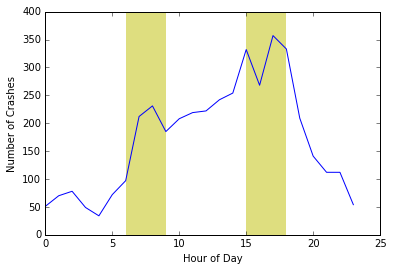

In [53]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(OrdHrCnts)
plt.axvspan(6, 9, color='y', alpha=0.5, lw=0)
plt.axvspan(15, 18, color='y', alpha=0.5, lw=0)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')

plt.show()


Let's now do a similar thing, but accross different days rather than hours. Weekends are highlighted.

In [119]:
import re
days=pandas.Series([re.search('-(.+)-(.+)',i).group(2) for i in data.DATE_])
dayCounts = days.value_counts()
ordDayCounts = [dayCounts.loc["{0:0=2d}".format(i)] for i in range(1,dayCounts.shape[0]+1)]

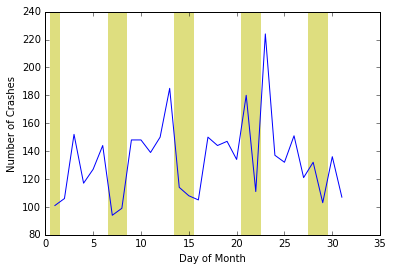

In [96]:
%matplotlib inline

plt.plot(range(1,32),ordDayCounts)
plt.axvspan(0.5, 1.5, color='y', alpha=0.5, lw=0)
plt.axvspan(6.5, 8.5, color='y', alpha=0.5, lw=0)
plt.axvspan(13.5, 15.5, color='y', alpha=0.5, lw=0)
plt.axvspan(20.5, 22.5, color='y', alpha=0.5, lw=0)
plt.axvspan(27.5, 29.5, color='y', alpha=0.5, lw=0)
plt.xlabel('Day of Month')
plt.ylabel('Number of Crashes')

plt.show()


It looks like weekend crashes may be less common... Let's look at the data another way.

In [120]:
weekendCounts = [];
weekendDays = [1,7,8,14,15,21,22,28,29];
for i in weekendDays[::-1]: weekendCounts.append(ordDayCounts.pop(i-1))

print weekendCounts

[103, 132, 111, 180, 108, 114, 99, 94, 101]


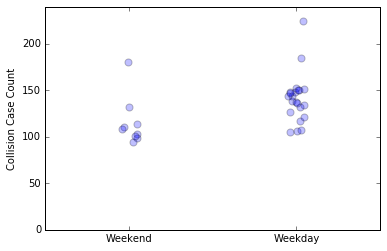

In [149]:
#plt.plot(range(1,32),ordDayCounts)
import random

ax1 = plt.subplot()

dayX = [2]*len(ordDayCounts)
wkdX = [1]*len(weekendCounts)

dayX = [i+(random.random()-0.5)/10 for i in dayX]
wkdX = [i+(random.random()-0.5)/10 for i in wkdX]

ax1.scatter(dayX+wkdX,ordDayCounts+weekendCounts,s=50,alpha=0.25)
ax1.set_xlim(0.5,2.5)
ax1.set_ylim(0,240)
ax1.set_xticks((1,2))
ax1.set_xticklabels(('Weekend','Weekday'))
ax1.set_ylabel('Collision Case Count')
plt.show()

So there appears to really be minimal difference between weekend & weekday crash counts, at least for this slice of data in January.

# Modelling collisions as a Poisson process

A Poisson process is one that occurs randomly over time (or in space). For a process that occurs with expected frequency $\lambda$ per unit time, the number of events $n$, observed after time $t$ is a random variable Poisson distributed with parameter $\lambda{t}$.

The Poisson distribution is defined as follows:

$\large P(\lambda{t},n) = \frac{\lambda{t}^{n}e^{-\lambda{t}}} {n!}$

If we assume that ${t}$ = 1 day and absorb it into $\lambda$, then $\lambda$ becomes the expected number of collisions in one day

$\large P(\lambda,n) = \frac{\lambda^{n}e^{-\lambda}} {n!}$

We can now determine the joint likelihood of observing the number of collisions each day, under the assumption that the days are iid draws from a poisson distribution. Joint likelihood:

$\large Likelihood(\lambda)={\displaystyle \prod_{i \in Days}^{} P(\lambda,n_i)}={\displaystyle \prod_{i \in Days}^{} \frac{\lambda^{n_i}e^{-\lambda}}{n_i!}}$

Since likelihood is only relative, we needn't include the denominator, since the factor of $\prod_{Days}^{} \frac{1} {n!}$ will be present at every value of $\lambda$.

Numeric stability is better if we calculate this as log-likelihood.

$RLL = \sum_{i \in Days}^{} nlog(\lambda) - \lambda$

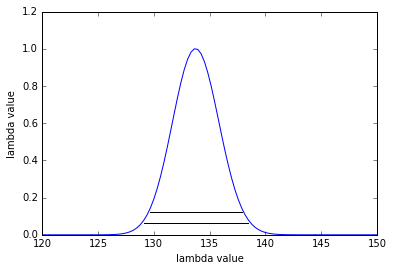

MLE = 133.64


In [198]:
from math import log,exp
import numpy as np

totDayCounts = ordDayCounts+weekendCounts
lambdavals=np.linspace(120,150,100)
def like(lam,n): return n*log(lam)-lam 

rloglik=[sum([like(lamval,n) for n in totDayCounts]) for lamval in lambdavals]
rloglik = [i-max(rloglik) for i in rloglik]
rlik = [exp(i) for i in rloglik]
rlikeighth = [j for (i,j) in zip(rlik,lambdavals) if i>0.125]
rliksixtnth = [j for (i,j) in zip(rlik,lambdavals) if i>0.0625]

ax2 = plt.subplot()
ax2.plot(lambdavals,rlik)
ax2.set_ylim(0,1.2)
ax2.set_xlabel('lambda value')
ax2.set_ylabel('relative likelihood')
ax2.plot(rlikeighth,[0.125]*len(rlikeighth), color='k')
ax2.plot(rliksixtnth,[0.0625]*len(rliksixtnth), color='k')

plt.show()

print 'MLE = {:03.2f}'.format([j for (i,j) in zip(rlik,lambdavals) if i==1.0][0])

## Interpreting likelihood

So the maximum likelihood estimate (MLE) for $\lambda$ is 133.64. Of course, this was really a roundabout way of calculation if all we really wanted was the point estimate for MLE, since the point estimate is of course nothing but the mean of the observations.

In [201]:
float(sum(totDayCounts))/len(totDayCounts)

#The number is slightly off due to the discretization of lambda above

133.74193548387098

However, the point estimate doesn't provide us with any sense of the uncertainty of our estimate. The full likelihood plot does. The lines for one eigth and one sixteenth likelihoods have been plotted. One eighth is a traditional cutoff on likelihood plots. The interpretation of these parameter values is that within this range there is no parameter value better than eight times better supported by the evidence.

# Auto collision lawyer billboards

Let's say we are an auto collision lawyer looking to place a billboard somewhere in LA county. We'd like to know what street to put our billboard on. Maybe it makes sense to put the billboard where many collisions are occuring. In that case, we'd like to get the street name where the most collisions are occurring.

There are many ways to get this information about street names. One would be to use a web API to provide information about a location based on lat/lon coordinates. The <a href="https://developers.google.com/maps/documentation/geocoding/intro">Google Maps Geocoding API</a> is a very feature-rich example. It is limited to 2500 queries per day. <a href="https://github.com/Project-OSRM/osrm-backend/wiki/Server-API---v4,-old">Project OSRM</a> is another no-frills example. 

We can ask the OSRM server which street is closest to the 2nd collision in the database with the following:

In [112]:
import urllib2
import ast

sampX=data.POINT_X[1]
sampY=data.POINT_Y[1]
page = urllib2.urlopen("http://router.project-osrm.org/nearest?loc="+str(sampY)+','+str(sampX))
stuff = page.next()
stuffdict = ast.literal_eval(stuff)
stuffdict['name']

'Gardena Freeway (CA 91)'

## Don't reinvent the wheel

Luckily, however, there already exists a column in the database with the streetname, and the nearest cross-street. Let's find the most collision-able streets:

In [162]:
#let's look at the top 200
rdCounts = data.PRIMARYRD.value_counts()[:20]
rdCounts

RT 5               114
RT 10              106
RT 405             105
RT 101              89
RT 110              60
RT 210              54
RT 60               54
RT 605              50
RT 710              36
RT 91               35
CRENSHAW BL         35
WESTERN AV          35
WILSHIRE BL         33
VERMONT AV          31
SANTA MONICA BL     30
OLYMPIC BL          30
FLORENCE AV         30
RT 14               28
SEPULVEDA BL        28
VICTORY BL          28
Name: PRIMARYRD, dtype: int64

Unsurprisingly, the freeways have the most collisions, followed by Crenshaw, Wilshire & Western.